# Week 12 Lecture - 14.4, 14.5, and 14.6
In this lecture, I will cover sections 14.4 (The Central Limit Theorem), 14.5 ( The Variability of the Sample Mean), and 14.6 (Choosing a Sample Size).

In [14]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [15]:
wheel = Table.read_table('roulette.csv')
wheel

Pocket | Color
0      | green
0      | green
1      | red
2      | black
3      | red
4      | black
5      | red
6      | black
7      | red
8      | black
... (28 rows omitted)

In [39]:
# win when red
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [40]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket | Color | Winnings: Red
0      | green | -1
0      | green | -1
1      | red   | 1
2      | black | -1
3      | red   | 1
4      | black | -1
5      | red   | 1
6      | black | -1
7      | red   | 1
8      | black | -1
... (28 rows omitted)

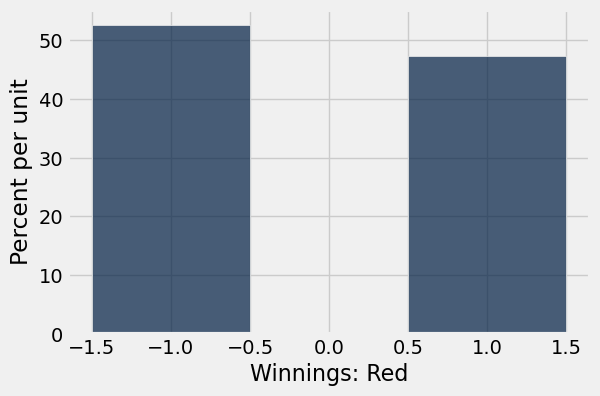

In [18]:
# graph the winnings
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

The code below simulates your net gain if you bet $1 on red on 400 different spins of the roulette wheel.

In [41]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

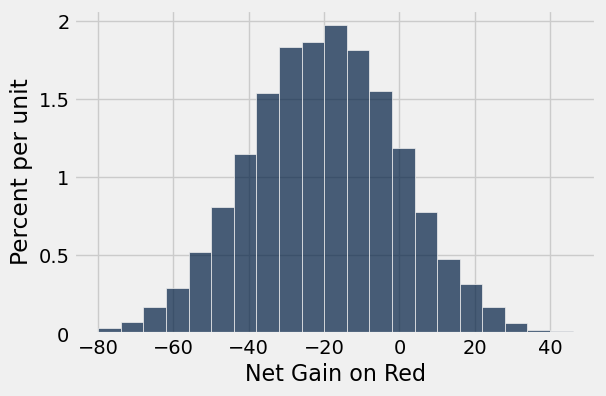

In [42]:
# create histogram
results.hist(bins=np.arange(-80, 50, 6))

In [43]:
# Center of distribution - Average = Mean
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [44]:
# Expected wins in 400 spins
400 * average_per_bet

-21.052631578947366

In [45]:
results

Net Gain on Red
-34
10
-34
-42
14
-24
6
-48
-10
-10
... (9990 rows omitted)

In [46]:
np.mean(results.column(0))

-20.979800000000001

In [47]:
# Spread of distribution
np.std(results.column(0))

19.870913214042275

# Summary
The net gain in 400 bets is the sum of the 400 amounts won on each individual bet. The probability distribution of that sum is approximately normal, with an average and an SD that we can approximate.

# Average Flight Delay

In [48]:
united = Table.read_table('united.csv')
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13815 rows omitted)

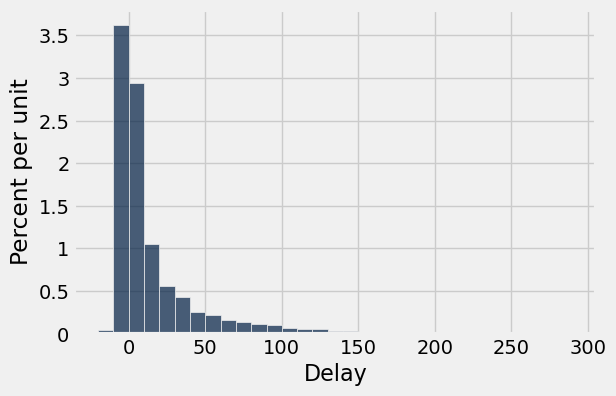

In [49]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [50]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [51]:
delay = united.select('Delay')
delay

Delay
257
28
-3
0
64
-6
-8
12
20
-10
... (13815 rows omitted)

In [52]:
np.mean(delay.sample(400).column('Delay'))

18.914999999999999

In [53]:
# 400 samples repeated 10,000 times
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

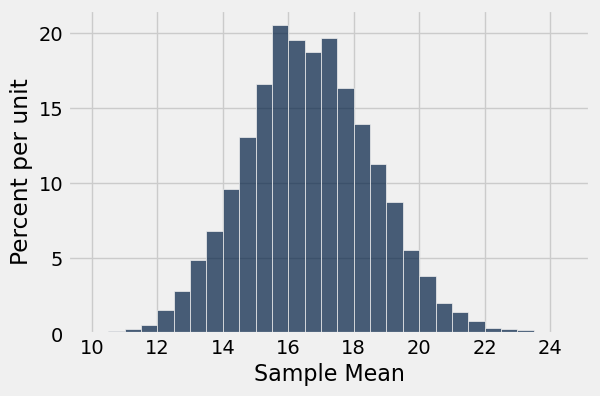

In [54]:
# histograms of results
results.hist(bins=np.arange(10, 25, 0.5))

# Central Limit Theorem
The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.
<br>
The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

## Proportion of Purple Flowers

In [55]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

Color
Purple
Purple
Purple
White

In [56]:
# take a sample of 200 plants and repeat the process 10,000
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

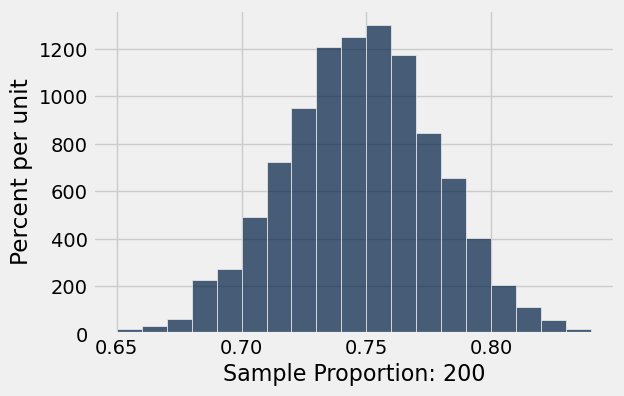

In [57]:
# draw histogram of results
results.hist(bins=np.arange(0.65, 0.85, 0.01))

In [58]:
# increase the sample size to 800
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

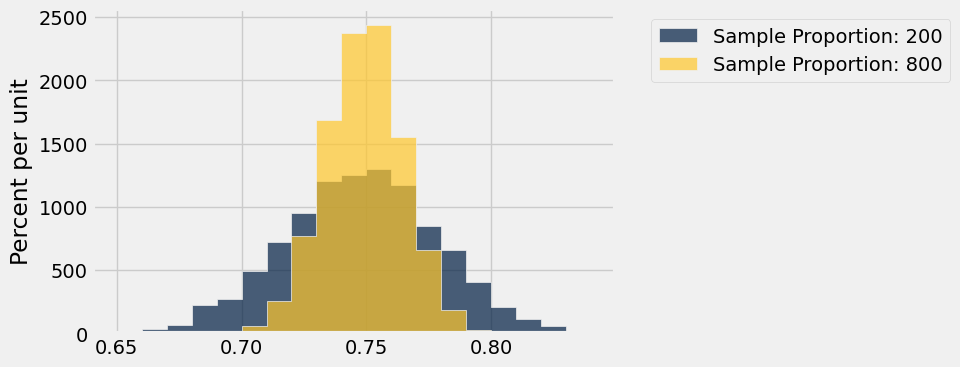

In [59]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

# Variability of the Sample Mean

In [60]:
united

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13815 rows omitted)

In [61]:
delay

Delay
257
28
-3
0
64
-6
-8
12
20
-10
... (13815 rows omitted)

In [62]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

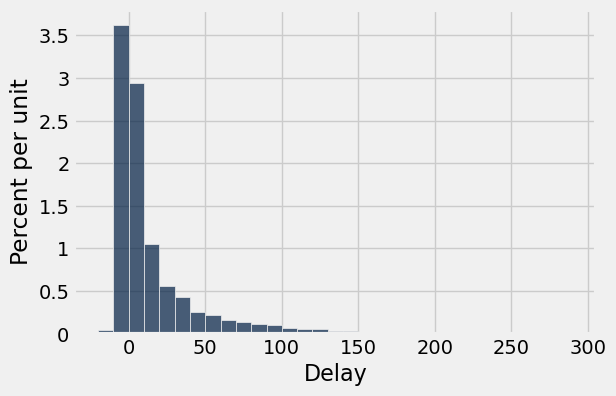

In [63]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [65]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.661523
Population SD: 39.4801998516
SD of sample means: 3.92542067178


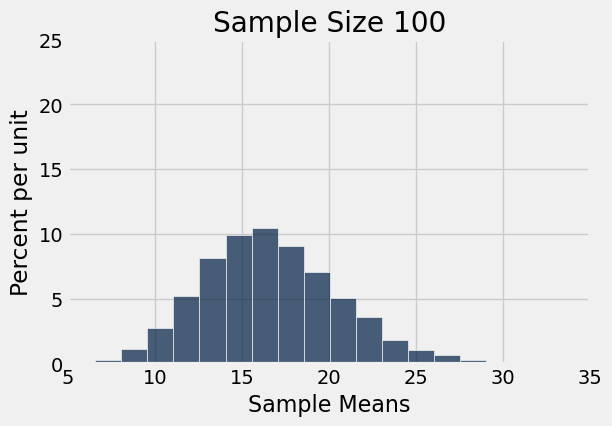

In [66]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.6342245
Population SD: 39.4801998516
SD of sample means: 1.94511641293


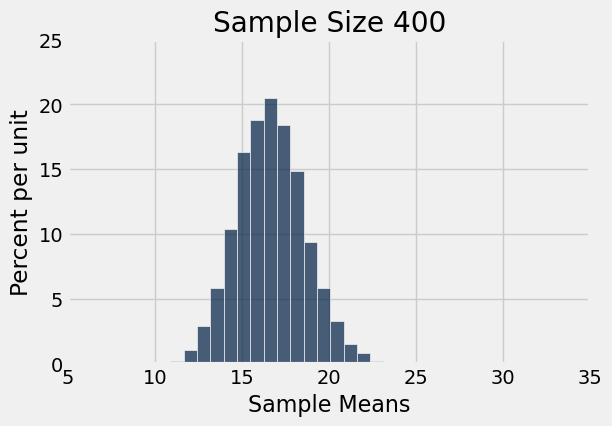

In [67]:
# change sample size to 400
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.65629952
Population SD: 39.4801998516
SD of sample means: 1.58841855285


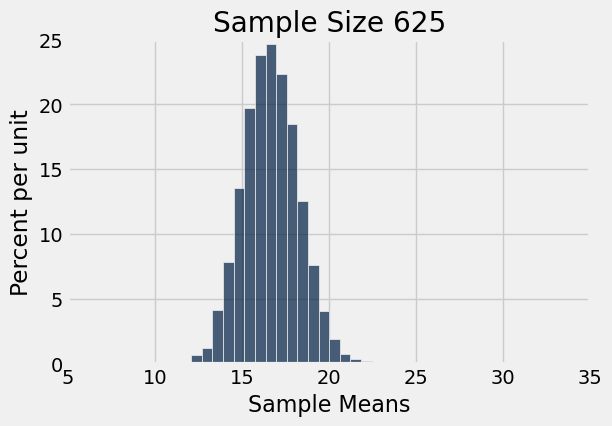

In [68]:
# Increase sample size to 625
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [69]:
# SD of all the sample Means
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [70]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [71]:
sd_comparison

Sample Size n | SD of 10,000 Sample Means | pop_sd/sqrt(n)
25            | 7.96725                   | 7.89604
50            | 5.55484                   | 5.58334
75            | 4.60226                   | 4.55878
100           | 3.91822                   | 3.94802
125           | 3.49521                   | 3.53122
150           | 3.20944                   | 3.22354
175           | 2.98527                   | 2.98442
200           | 2.77333                   | 2.79167
225           | 2.62811                   | 2.63201
250           | 2.47998                   | 2.49695
... (15 rows omitted)

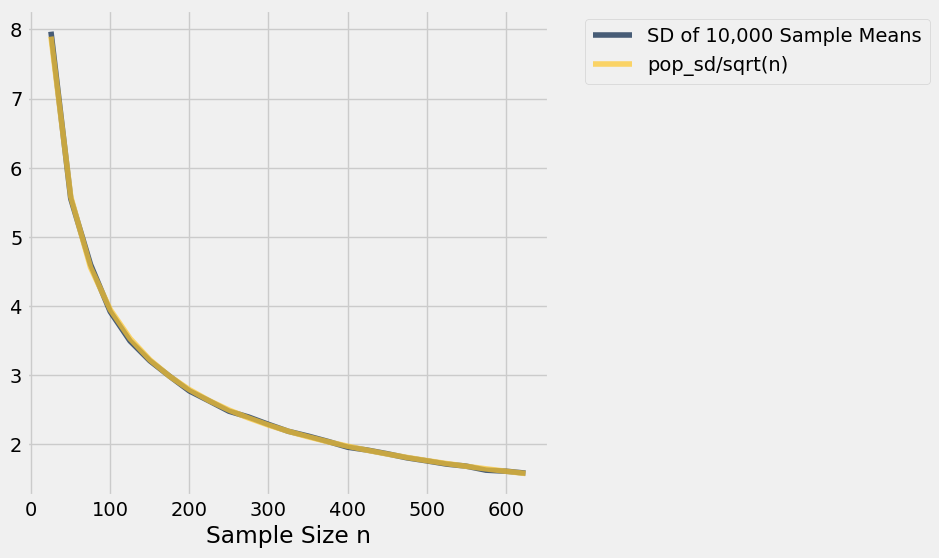

In [72]:
sd_comparison.plot('Sample Size n')

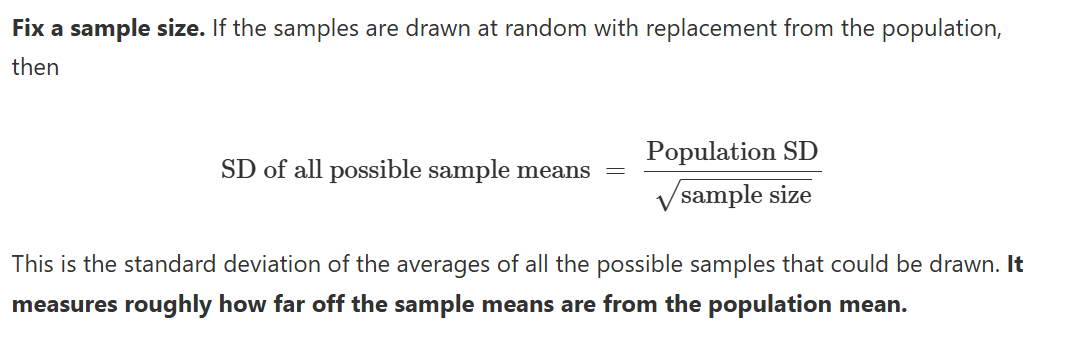

In [73]:
baby = Table.read_table('baby.csv')
baby

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [74]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [75]:
sd_height = np.round(np.std(heights),1)
sd_height

2.5

In [76]:
heights.min(), heights.max()

(53, 72)

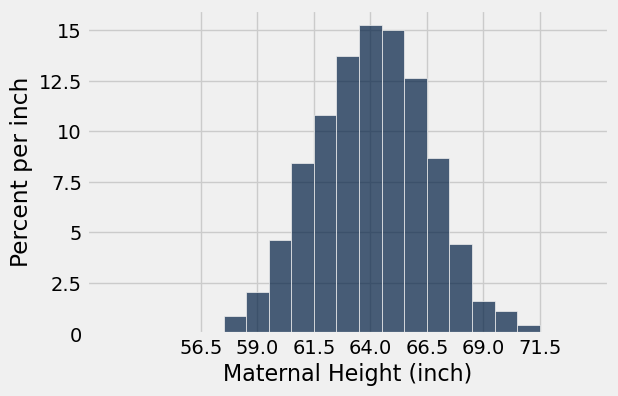

In [77]:
baby.hist('Maternal Height', bins=np.arange(52.5, 73.6, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

# How to spot the SD on a bell shaped curve
To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an “upside-down cup” to a “right-way-up cup”; formally, the curve has a point of inflection. That point is one SD above average. It is the point z = 1, which is “average plus 1 SD” = 66.5 inches.

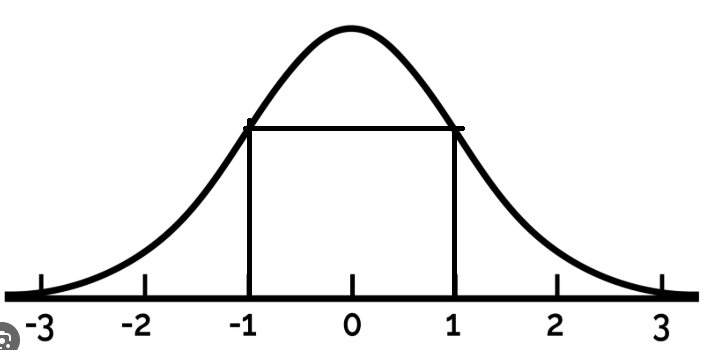


# The Standard Normal Curve
Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1.

-- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

```
from scipy import stats
stats.norm.cdf(z)
```
where z is the number of standard deviations from the mean.


In [79]:
from scipy import stats
stats.norm.cdf(1)

0.84134474606854293

## Area to the left of 1 on the normal curve is 84.13%

In [78]:
1 - stats.norm.cdf(1)

0.15865525393145707

## Area to the right of 1 on the normal curve is 15.87%

In [80]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

## Area between -1 and 1 on the normal curve is 68.27%

In [81]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

## Area between -2 and 2 on the normal curve is 95.45%

In [82]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.99730020393673979

## Area between -3 and 3 on the normal curve is 99.73%

# Empirical Rule
When our curve is bell shaped we can use the Empirical Rule which is an approximation of the Normal curve.  Otherwise, use Chebychev;s bounds
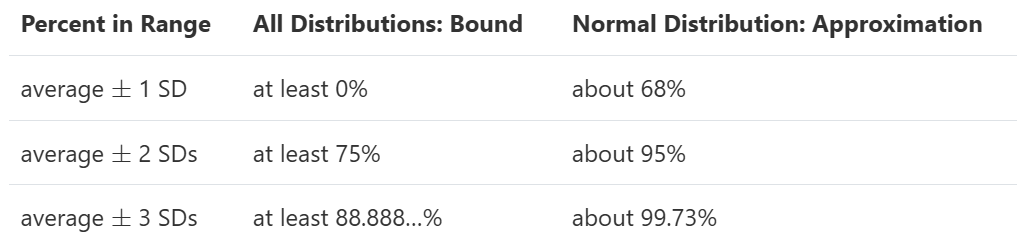

# Choosing a Sample Size
If I want to know the sample size to determine the percentage of people who are for a proposition that is on the ballot within a 1% margin and I want to be 95% accurate.  I can use the concept of confidence intervals to determine the sample size.

The confidence interval for 95% is between average - 2sd/sqrt(n) and average + 2sd/sqrt(n).  If I look at the length of the confidence interval it would be<br>
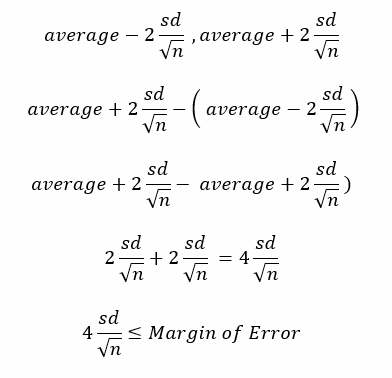
The Margin of error is the accuracy.


In [91]:
accuracy = .02
z = 2
p = .5
np.ceil(16 * p*(1-p)/accuracy**2)

10000.0

In [97]:
p = .50
px = make_array()
ac = make_array()
n_sample = make_array()
for j in np.arange(.1, .91, .1):
    for i in np.arange(.01, .11, .01):
        nx = np.ceil(16 * j*(1-j)/i**2)
        px = np.append(px, j)
        ac = np.append(ac, i)
        n_sample = np.append(n_sample, nx)
    

In [98]:

sample_size_n = Table().with_columns('Accuracy', ac,
                                     'Sample Size', n_sample,
                                     'p value', px)
sample_size_n

Accuracy | Sample Size | p value
0.01     | 14401       | 0.1
0.02     | 3601        | 0.1
0.03     | 1601        | 0.1
0.04     | 901         | 0.1
0.05     | 576         | 0.1
0.06     | 400         | 0.1
0.07     | 294         | 0.1
0.08     | 226         | 0.1
0.09     | 178         | 0.1
0.1      | 145         | 0.1
... (80 rows omitted)

In [99]:
sample_size_n.where('p value', 0.2)


Accuracy | Sample Size | p value
0.01     | 25601       | 0.2
0.02     | 6401        | 0.2
0.03     | 2845        | 0.2
0.04     | 1601        | 0.2
0.05     | 1024        | 0.2
0.06     | 712         | 0.2
0.07     | 523         | 0.2
0.08     | 401         | 0.2
0.09     | 317         | 0.2
0.1      | 257         | 0.2

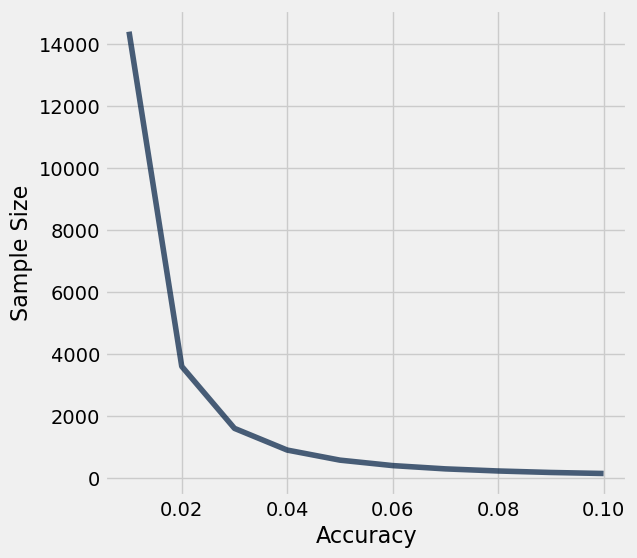

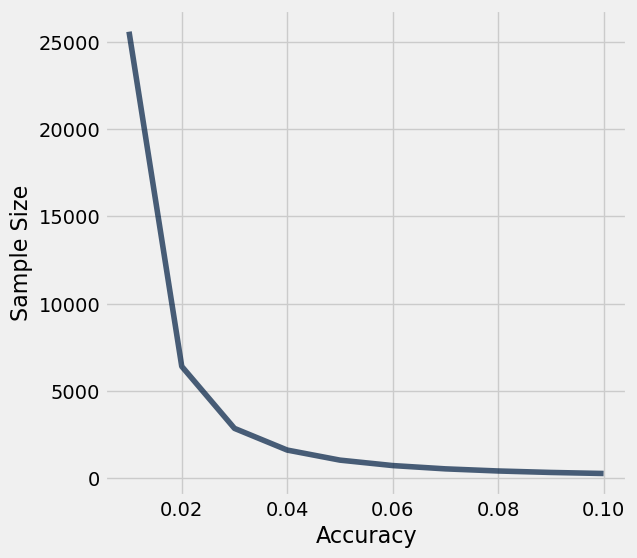

In [105]:
sample_size_n.where('p value', 0.1).plot('Accuracy', 'Sample Size')
sample_size_n.where('p value', 0.2).plot('Accuracy', 'Sample Size')

In [115]:
sample_size_n.pivot('Accuracy', 'p value', values = 'Sample Size', collect = sum)

p value | 0.01  | 0.02  | 0.03 | 0.04 | 0.05 | 0.06 | 0.07 | 0.08 | 0.09 | 0.1
0.1     | 14401 | 3601  | 1601 | 901  | 576  | 400  | 294  | 226  | 178  | 145
0.2     | 25601 | 6401  | 2845 | 1601 | 1024 | 712  | 523  | 401  | 317  | 257
0.3     | 33600 | 8400  | 3734 | 2100 | 1344 | 934  | 686  | 525  | 415  | 337
0.4     | 38400 | 9600  | 4267 | 2400 | 1536 | 1067 | 784  | 600  | 475  | 385
0.5     | 40000 | 10000 | 4445 | 2500 | 1600 | 1112 | 817  | 625  | 494  | 401
0.6     | 38400 | 9600  | 4267 | 2400 | 1536 | 1067 | 784  | 600  | 475  | 385
0.7     | 33600 | 8400  | 3734 | 2100 | 1344 | 934  | 686  | 525  | 415  | 336
0.8     | 25600 | 6400  | 2845 | 1600 | 1024 | 712  | 523  | 400  | 317  | 256
0.9     | 14400 | 3600  | 1600 | 900  | 576  | 400  | 294  | 225  | 178  | 144